In [7]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load the dataset
file_path = "./spam.csv"
df = pd.read_csv(file_path)

# Display basic information and first few rows
df_info = df.info()
df_head = df.head()

df_info, df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


(None,
   Category                                            Message
 0      ham  Go until jurong point, crazy.. Available only ...
 1      ham                      Ok lar... Joking wif u oni...
 2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
 3      ham  U dun say so early hor... U c already then say...
 4      ham  Nah I don't think he goes to usf, he lives aro...)

In [40]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [42]:
df.columns

Index(['Category', 'Message'], dtype='object')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [46]:
df.isna().sum()

Category    0
Message     0
dtype: int64

In [48]:
df['Spam']= df['Category'].apply(lambda x: 1 if x=='spam' else 0)
df.head(5)

,Category,Message,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_41152\2926870853.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Label'], palette='viridis')


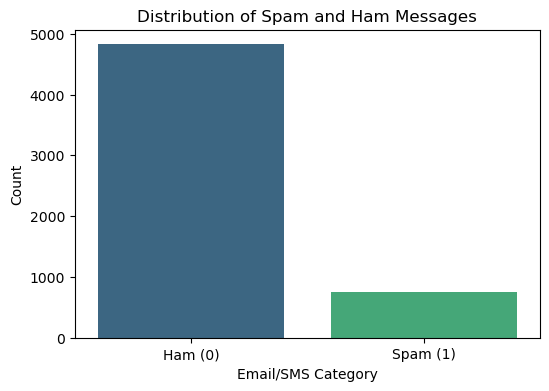

In [50]:
# Rename columns for clarity
df.rename(columns={'Category': 'Label', 'Message': 'Text'}, inplace=True)

# Convert label to numerical (Ham = 0, Spam = 1)
df['Label'] = df['Label'].map({'ham': 0, 'spam': 1})

# Class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Label'], palette='viridis')
plt.xticks(ticks=[0, 1], labels=["Ham (0)", "Spam (1)"])
plt.xlabel("Email/SMS Category")
plt.ylabel("Count")
plt.title("Distribution of Spam and Ham Messages")
plt.show()

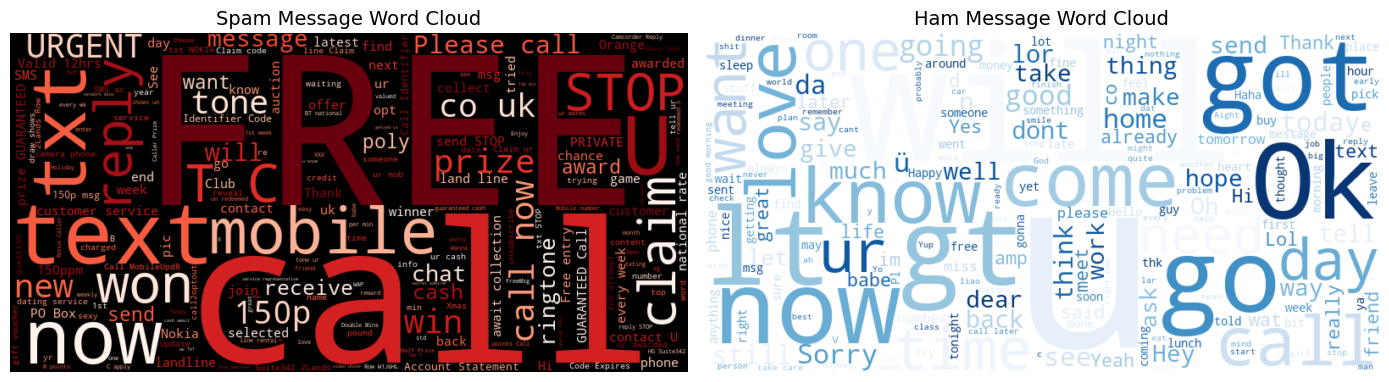

In [27]:
# Word cloud for Spam messages
spam_words = " ".join(df[df['Label'] == 1]['Text'])
spam_wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(spam_words)

# Word cloud for Ham messages
ham_words = " ".join(df[df['Label'] == 0]['Text'])
ham_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(ham_words)

# Plot word clouds
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
axes[0].imshow(spam_wordcloud, interpolation='bilinear')
axes[0].axis("off")
axes[0].set_title("Spam Message Word Cloud", fontsize=14)

axes[1].imshow(ham_wordcloud, interpolation='bilinear')
axes[1].axis("off")
axes[1].set_title("Ham Message Word Cloud", fontsize=14)

plt.tight_layout()
plt.show()

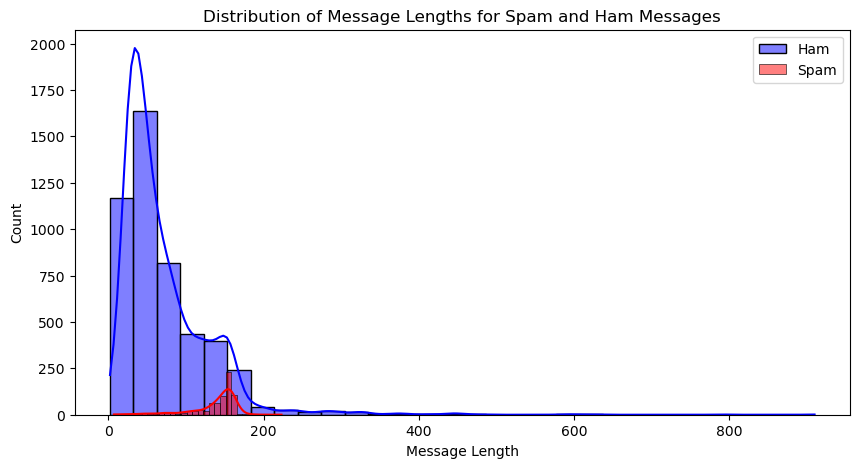

In [52]:
# Message length distribution
df['Text_Length'] = df['Text'].apply(len)

plt.figure(figsize=(10, 5))
sns.histplot(df[df['Label'] == 0]['Text_Length'], bins=30, color='blue', label="Ham", kde=True)
sns.histplot(df[df['Label'] == 1]['Text_Length'], bins=30, color='red', label="Spam", kde=True)
plt.legend()
plt.xlabel("Message Length")
plt.ylabel("Count")
plt.title("Distribution of Message Lengths for Spam and Ham Messages")
plt.show()